In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Load your dataset
df = pd.read_csv("/Users/vidalstott/Downloads/archive-5/BTCUSD_1h_Combined_Index.csv")

# Convert 'Open time' to datetime
df['Open time'] = pd.to_datetime(df['Open time'])

# Set 'Open time' as the index
df.set_index('Open time', inplace=True)

# Resample to daily data and keep the highest "High" for each day
daily_high = df['High'].resample('D').max()

# Create a DataFrame with the results
daily_df = daily_high.reset_index()
daily_df.rename(columns={'High': 'Daily High'}, inplace=True)

# Define epochs based on halving dates
halving_dates = [
    "2011-08-17",  # First epoch
    "2012-11-28",  # Second epoch
    "2016-07-09",  # Third epoch
    "2020-05-11",  # Fourth epoch
    "2024-04-19"   # Fifth epoch
]

# Convert halving dates to datetime
halving_dates = pd.to_datetime(halving_dates)

# Add a new column to indicate the epoch
daily_df['Epoch'] = pd.cut(
    daily_df['Open time'], 
    bins=halving_dates.to_list() + [pd.Timestamp.max],
    labels=["Epoch 1", "Epoch 2", "Epoch 3", "Epoch 4", "epoch 5"]
)

# Filter out data after the latest halving
daily_df = daily_df[daily_df['Open time'] < "2024-04-19"]

# Save the processed data to a new CSV (optional)
daily_df.to_csv("processed_bitcoin_data.csv", index=False)

# Display the result
daily_df.head(5)

,Open time,Daily High,Epoch
0,2011-08-18,10.90,Epoch 1
1,2011-08-19,11.85,Epoch 1
2,2011-08-20,11.70,Epoch 1
3,2011-08-21,11.70,Epoch 1
4,2011-08-22,11.70,Epoch 1


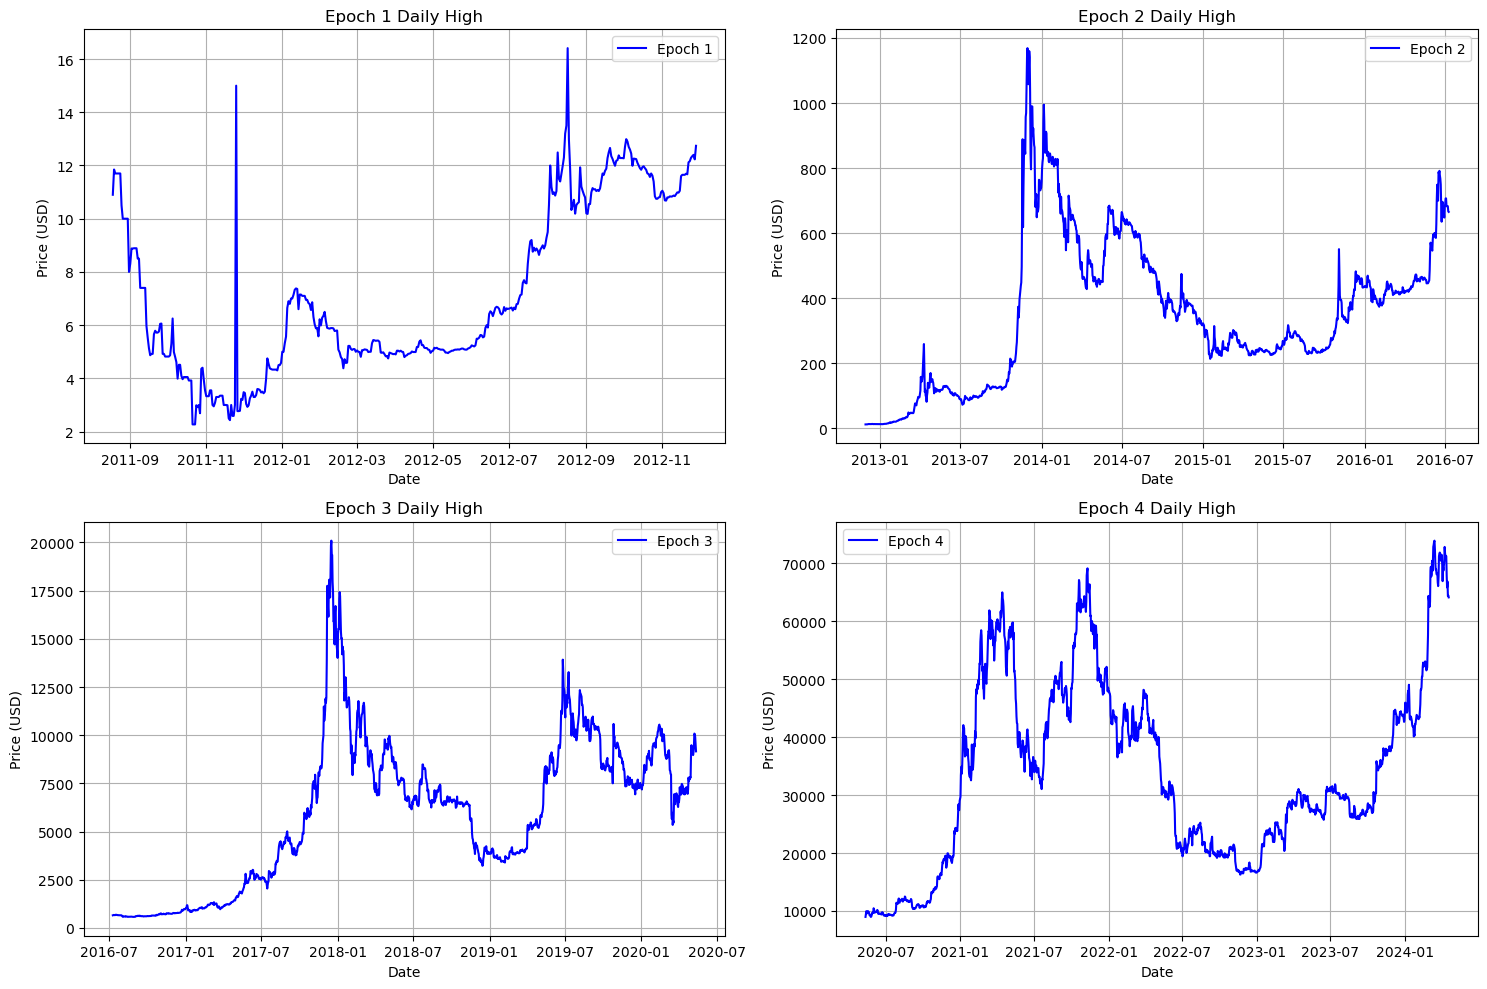

In [8]:
import matplotlib.pyplot as plt

# Filter data for each epoch
epochs = ['Epoch 1', 'Epoch 2', 'Epoch 3', 'Epoch 4']
epoch_data = {epoch: daily_df[daily_df['Epoch'] == epoch] for epoch in epochs}

# Create separate graphs for each epoch
plt.figure(figsize=(15, 10))  # Set overall figure size

for i, epoch in enumerate(epochs, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of plots
    data = epoch_data[epoch]
    plt.plot(data['Open time'], data['Daily High'], label=epoch, color='blue')
    plt.title(f"{epoch} Daily High")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid(True)
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [9]:
# Extract the maximum price for each epoch
epoch_peaks = daily_df.groupby('Epoch')['Daily High'].max()

# Calculate growth rates between epochs
growth_rates = epoch_peaks.pct_change().dropna()

print("Epoch Peaks:", epoch_peaks)
print("Growth Rates:", growth_rates)


Epoch Peaks: Epoch
Epoch 1       16.410000
Epoch 2     1168.685880
Epoch 3    20092.994433
Epoch 4    73927.487624
epoch 5             NaN
Name: Daily High, dtype: float64
Growth Rates: Epoch
Epoch 2    70.217909
Epoch 3    16.192810
Epoch 4     2.679267
epoch 5     0.000000
Name: Daily High, dtype: float64


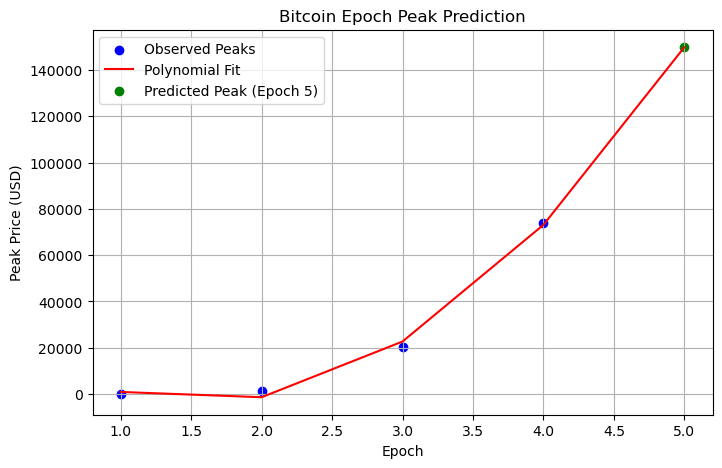

Predicted Peak for Epoch 5: $149818.55


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare data for fitting
x = np.array([1, 2, 3, 4])  # Epoch numbers (1–4)
y = np.array(epoch_peaks.iloc[:4].values)  # Peak prices for Epochs 1–4

# Fit a polynomial model (degree 2)
coefficients = np.polyfit(x, y, 2)
polynomial_model = np.poly1d(coefficients)

# Predict the peak for Epoch 5
x_pred = 5
y_pred = polynomial_model(x_pred)

# Plot the model
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Observed Peaks')
plt.plot(np.arange(1, 6), polynomial_model(np.arange(1, 6)), color='red', label='Polynomial Fit')
plt.scatter(x_pred, y_pred, color='green', label=f'Predicted Peak (Epoch {x_pred})')
plt.title("Bitcoin Epoch Peak Prediction")
plt.xlabel("Epoch")
plt.ylabel("Peak Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Predicted Peak for Epoch {x_pred}: ${y_pred:.2f}")


In [41]:
print(epoch_peaks)

Epoch
Epoch 1       16.410000
Epoch 2     1168.685880
Epoch 3    20092.994433
Epoch 4    73927.487624
epoch 5             NaN
Name: Daily High, dtype: float64
